# Exploratory Data Analysis (EDA) on Fitbit Fitness Tracker Data
This data is obtained from Kaggle dataset (https://www.kaggle.com/datasets/arashnic/fitbit)


## Objectives

The objective or goal of this exploration is to clean up the data (remove duplicates, null values, outliers etc..) and make it ready and suitable for regression analysis. 

We will do this systematically by appying the following steps:

- Reading in the data and creating a backup dataset
- Extracting some basic statistics from the numeric features 
- Creating Data visualization of our features to check from normality, outliers, trends etc
- Applying Feature Engineering  
- Check for correlations between features
- Implementing One-hot encoding to our non-numeric features

In [499]:
import os
import pandas as pd
import numpy as np

In [500]:
filepath="dailyActivity_merged.csv"
data = pd.read_csv(filepath)

In [501]:
dt_fin=data.copy()

In [502]:
dt_backup = data.copy()

## Preliminary Study : Shape of the dataframe, Column names, Info/Id etc 

In [503]:
row = data.shape[0]
cols = data.shape[1]
print("There are {} rows of data".format(row), "with {} features in this dataset".format(cols))

There are 940 rows of data with 15 features in this dataset


Let us look at the various features that describe our datset. 

In [504]:
list(data.columns)

['Id',
 'ActivityDate',
 'TotalSteps',
 'TotalDistance',
 'TrackerDistance',
 'LoggedActivitiesDistance',
 'VeryActiveDistance',
 'ModeratelyActiveDistance',
 'LightActiveDistance',
 'SedentaryActiveDistance',
 'VeryActiveMinutes',
 'FairlyActiveMinutes',
 'LightlyActiveMinutes',
 'SedentaryMinutes',
 'Calories']

**First look** : Here's a snap shot of what the data looks like.

In [505]:
data.iloc[:7].T

,0,1,2,3,4,5,6
Id,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366,1503960366
ActivityDate,4/12/2016,4/13/2016,4/14/2016,4/15/2016,4/16/2016,4/17/2016,4/18/2016
TotalSteps,13162,10735,10460,9762,12669,9705,13019
TotalDistance,8.5,6.97,6.74,6.28,8.16,6.48,8.59
TrackerDistance,8.5,6.97,6.74,6.28,8.16,6.48,8.59
LoggedActivitiesDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VeryActiveDistance,1.88,1.57,2.44,2.14,2.71,3.19,3.25
ModeratelyActiveDistance,0.55,0.69,0.4,1.26,0.41,0.78,0.64
LightActiveDistance,6.06,4.71,3.91,2.83,5.04,2.51,4.71
SedentaryActiveDistance,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  Renamimg the unique Id numbers to P01, P02 etc

Each unique Id is denoted by a long 10 didgit number. The number by itself is meaningless so we shall rename it a string (P1, P2, etc) for an easier read, where P1 corresponds to person 1, P2 to person 2 and so on.

In [506]:
Id_copy = data.Id.unique()

for i in range(len(Id_copy)):
    if(i<9):
        data.loc[data['Id']==Id_copy[i], 'Id'] = 'P0'+str(i+1)
    else:
        data.loc[data['Id']==Id_copy[i], 'Id'] = 'P'+str(i+1)

data.Id.value_counts().rename_axis('Id').reset_index(name='count').T

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Id,P01,P15,P31,P30,P28,P27,P25,P20,P19,P18,...,P21,P32,P23,P22,P24,P26,P11,P29,P09,P14
count,31,31,31,31,31,31,31,31,31,31,...,30,29,29,28,26,26,20,19,18,4


This shows that most individuals (described by their unique Id, renamed as P01, P02, etc..) have between 26-31 data entries each. Only 4 indivuduals have 20 or fewer data entries and among them **only 1 individual has a meagre 4 recorded personal data**. 

## Checking for null values 

In [507]:
data.isnull().sum().rename_axis('Columns').reset_index(name='Null_vals')

,Columns,Null_vals
0,Id,0
1,ActivityDate,0
2,TotalSteps,0
3,TotalDistance,0
4,TrackerDistance,0
5,LoggedActivitiesDistance,0
6,VeryActiveDistance,0
7,ModeratelyActiveDistance,0
8,LightActiveDistance,0
9,SedentaryActiveDistance,0


No null values in our data .. great!

## Checking for duplictes 

The snapshot of the data in the earlier section revealed that the features Total distance and Tracker Data might be indentical. We need to check to see if these values are indeed identical for the rest of the data. 

In [508]:
diff = data.TotalDistance - data.TrackerDistance
diff.head()
count=0
for i in range(len(diff)):
    if diff[i] == 0.0:
        continue
    else:
        count += 1
        
if count>0:
    print("Total Distance and Tracker Data are not identical.")
    print('Number of distinct (non-similar) values = ', count)
    

Total Distance and Tracker Data are not identical.
Number of distinct (non-similar) values =  15


Good.

#  Extracting some basic statistics from the data
 

In [509]:
round(data.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
TotalSteps,940.0,7637.91,5087.15,0.0,3789.75,7405.50,10727.00,36019.00
TotalDistance,940.0,5.49,3.92,0.0,2.62,5.24,7.71,28.03
TrackerDistance,940.0,5.48,3.91,0.0,2.62,5.24,7.71,28.03
LoggedActivitiesDistance,940.0,0.11,0.62,0.0,0.00,0.00,0.00,4.94
VeryActiveDistance,940.0,1.50,2.66,0.0,0.00,0.21,2.05,21.92
ModeratelyActiveDistance,940.0,0.57,0.88,0.0,0.00,0.24,0.80,6.48
LightActiveDistance,940.0,3.34,2.04,0.0,1.95,3.36,4.78,10.71
SedentaryActiveDistance,940.0,0.00,0.01,0.0,0.00,0.00,0.00,0.11
VeryActiveMinutes,940.0,21.16,32.84,0.0,0.00,4.00,32.00,210.00
FairlyActiveMinutes,940.0,13.56,19.99,0.0,0.00,6.00,19.00,143.00


**Inferences**

- The **significant difference between the mean and the 50th percentile** for the following features indicate that these features are skewed.  
    - Very Active Distance
    - Moderately Active Distance
    - Very Active Minutes 
    - Fairly Active Minutes


- **Sedentary Active Distance:**

    The min, 25th, 50th and the 75th percentiles all show a value of 0.0 with a mean value of 0.001! This clearly shows that this feature is primarily populated with zeros and it's non-zero values are insignificant. This field is not going to contribute to calorie prediction and can safely be **dropped from our analysis.**

## Final Dataset : Dropping Sedentary Active Distance 


In [510]:
dt_fin=data.drop(['SedentaryActiveDistance'], axis=1)
list(dt_fin.columns)

['Id',
 'ActivityDate',
 'TotalSteps',
 'TotalDistance',
 'TrackerDistance',
 'LoggedActivitiesDistance',
 'VeryActiveDistance',
 'ModeratelyActiveDistance',
 'LightActiveDistance',
 'VeryActiveMinutes',
 'FairlyActiveMinutes',
 'LightlyActiveMinutes',
 'SedentaryMinutes',
 'Calories']

# Hypothesis Tesing

Let's look at the total number of data entried for each individual. This will illustrate if all the individuals have the same amount of info per person.

In [511]:
Id_val_counts=data.Id.value_counts(ascending=True).rename_axis('Id').reset_index(name='counts').T
Id_val_counts

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Id,P14,P09,P29,P11,P26,P24,P22,P32,P23,P03,...,P13,P10,P08,P07,P06,P05,P04,P02,P19,P33
counts,4,18,19,20,26,26,28,29,29,30,...,31,31,31,31,31,31,31,31,31,31


We find that the individual with Id **P14 has only 4 data entries** against his Id. The rest of the individuals have 4 to 8 times more data per person. Given the meagre amount of data for P14, removing P14 from our analysis **may** not going to influence the analysis. 

In order to ensure that removing the individual P14's data from our dataset does not we need to perform **hypothesis testing.** 


## Null and Alternate hypothesis

Let us define the **null hypothesis, H_0** as,

H_0 = "removing the data pertaining to the individual P14 will NOT affect our overall statistics of our dataset"

Our **Alternate hypothesis,  H_a** as,

H_a = "removing the data pertaining to the individual P14 WILL affect our overall statistics of our dataset".

**Cut off**
We will define out cut-off value as

alpha=0.05

**Let us look at the feature "total steps" and compare how this feature changes with and without P14 data**

## Plotting with and without P14

In [512]:
tot_steps_wP14 = data.TotalSteps
calories_wP14 = data.Calories

The following a plot of the features Total Steps and Calories with and witout the P14 data. 

In [513]:
#data.drop(index='P14')
tmp2 = data.copy()

ind = tmp2[ (tmp2['Id'] == 'P14')].index
ind
tmp2.drop(ind , inplace=True)
tmp2.shape

tot_steps_wo_P14 = tmp2.TotalSteps
calories_wo_P14 = tmp2.Calories

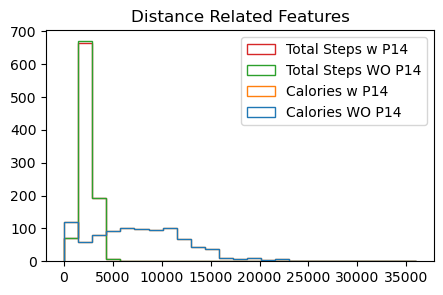

In [514]:
fig, ax= plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(5,3)

ax.hist(x=[tot_steps_wP14,  tot_steps_wo_P14, calories_wP14, calories_wo_P14],
        bins=25, alpha=1.0, rwidth = 0.7,
        histtype='step', fill=False)
ax.set_title('Distance Related Features')
ax.legend(['Total Steps w P14',  'Total Steps WO P14', 'Calories w P14', 'Calories WO P14'])

plt.show()

## t-test

We will look at pValue from running a t-test on the total steps with and without P14. If pvalue is greater than our cut-off value, alpha=0.05, then we reject the null hypothesis.

In [515]:
import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

alpha=0.05
t_value1, p_value1 = stats.ttest_ind(tot_steps_wP14, tot_steps_wo_P14)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -0.06911334576330959 , p_value1 =  0.9449067715809839


In [516]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format(round(p_value1,2),alpha))
    print("Reject the null hypothesis that there is no difference if we remove P14 data.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format(round(p_value1,2),alpha))
    print("Fail to reject the null hypothesis that there is no difference if we remove P14 data.")

Conclusion: since p_value 0.94 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is no difference if we remove P14 data.


We **can**, therefore, **remove P14** data while still preserving the integrity of the larger dataset!

## Final Dataset : Removing P14 

In [517]:
tmp2 = data.copy()

ind = dt_fin[ (dt_fin['Id'] == 'P14')].index
dt_fin.drop(ind , inplace=True)
dt_fin.shape


(936, 14)

#  Data Visualizations

In order to declutter our plots, we will look at data visualizations of distance related features first and then move onto the time or minutes related features.

In [518]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

## Pairplot to understand the relationship between the DISTANCE related features and calories burnt

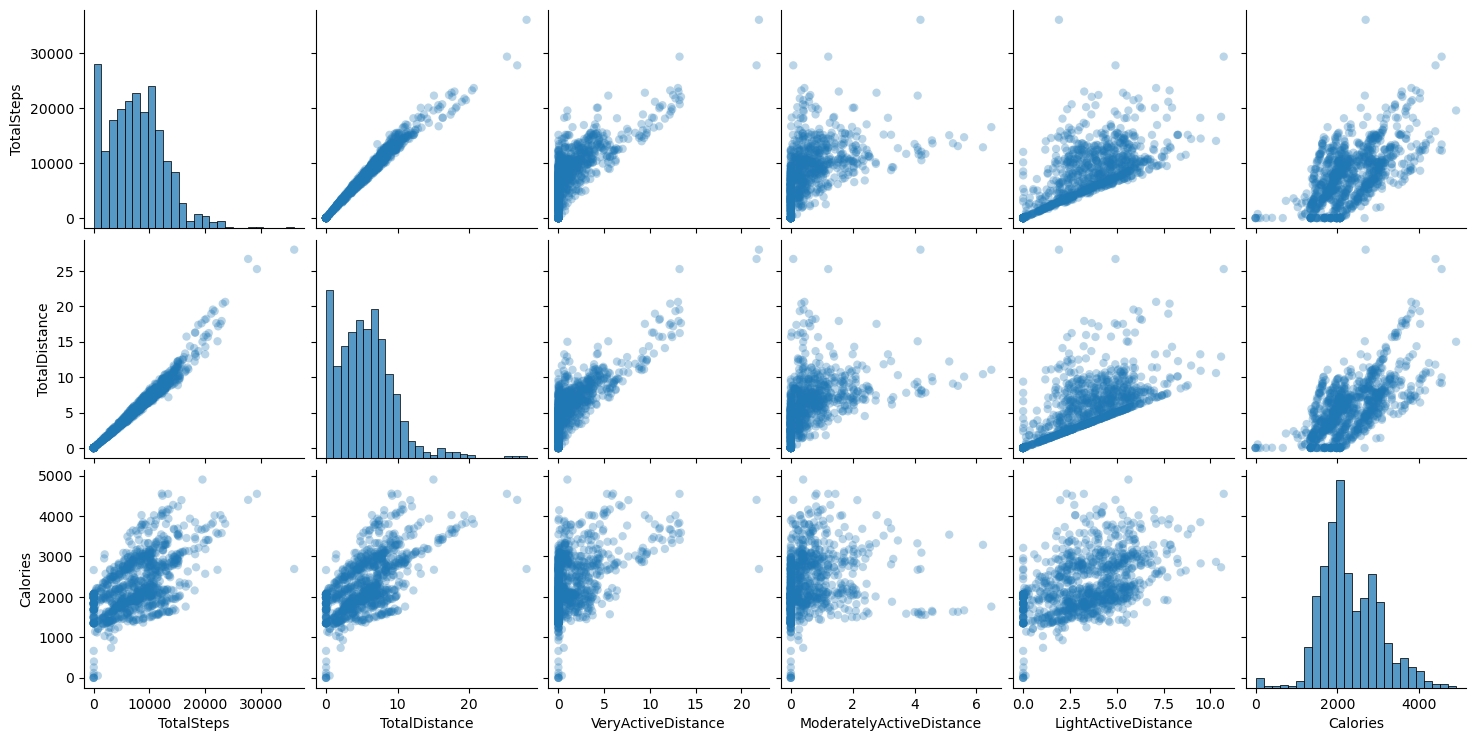

In [519]:
cal_vs_distance = data.loc[:,['Id','TotalSteps', 'TotalDistance', 'VeryActiveDistance',
                        'ModeratelyActiveDistance','LightActiveDistance','Calories']]


sns.pairplot(cal_vs_distance,
             x_vars=['TotalSteps', 'TotalDistance', 
                     'VeryActiveDistance',
                     'ModeratelyActiveDistance','LightActiveDistance', 
                     'Calories'],
             y_vars=['TotalSteps', 'TotalDistance','Calories'],
             plot_kws=dict(alpha=.3, edgecolor='none'))

plt.show()

**Plot Highlights:**
- Histogram for the features Total Steps and Total Distance show a skew. 

- Total steps and total distance display a perfect linear relation. 

- We also see linearity between Calories and the features Total Distance and Total Steps. 

- The feature Lightly Active Distance shows a strong linear correlation with Total Steps, Total Distance and Calories. Among the various active distances (very active, moderately active and lightly active), the feature lightly active distance is the one contributing the most to total steps, total distance and calories!

- Calories data is normally distributed and does not need transforming. 

## Pairplot to understand the relationship between active TIME spent and calories burnt

Now we will perform the same analysis on features related to time/minutes.

In [520]:
tmp = data.VeryActiveMinutes + data.FairlyActiveMinutes + data.LightlyActiveMinutes #+ data.SedentaryMinutes
data['TotalActiveTime']=tmp

cal_vs_time = data.loc[:,['Id','TotalActiveTime','VeryActiveMinutes','FairlyActiveMinutes',
                        'LightlyActiveMinutes','SedentaryMinutes','Calories']]


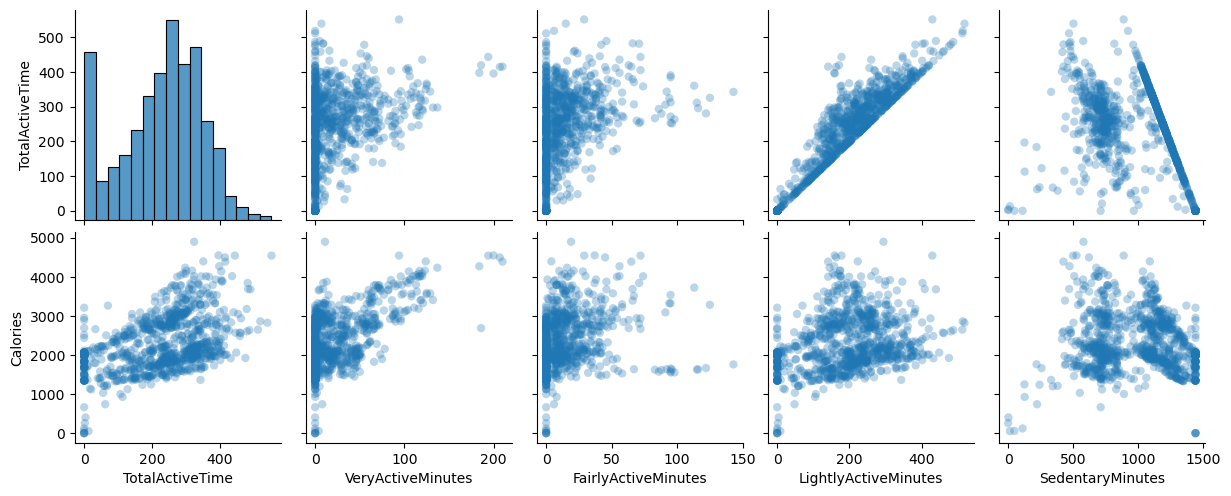

In [521]:
data.columns

cal_vs_time = data.loc[:,['Id','TotalActiveTime','VeryActiveMinutes','FairlyActiveMinutes',
                        'LightlyActiveMinutes','SedentaryMinutes','Calories']]


sns.pairplot(data=cal_vs_time, 
             x_vars=['TotalActiveTime','VeryActiveMinutes','FairlyActiveMinutes',
                     'LightlyActiveMinutes','SedentaryMinutes'],
             y_vars=['TotalActiveTime','Calories'],
             plot_kws=dict(alpha=.3, edgecolor='none'))

plt.show()

**Plot Highlights**

- We observe a clear **linearity** between **Light** Active Minutes and **Total Active** Minutes.  

- As expected, we see **linearity** between **total** minutes and **calories**. 

##  Checking for Skew

We have several of numeric columns in our dataset so let's take a look at how these features are distrubuted. The objective here is to determine if the data in these numeric columns are skewed or not, and to quanitfy the skew when there is one. 

Here is the plot of the skew for all these numeric features:

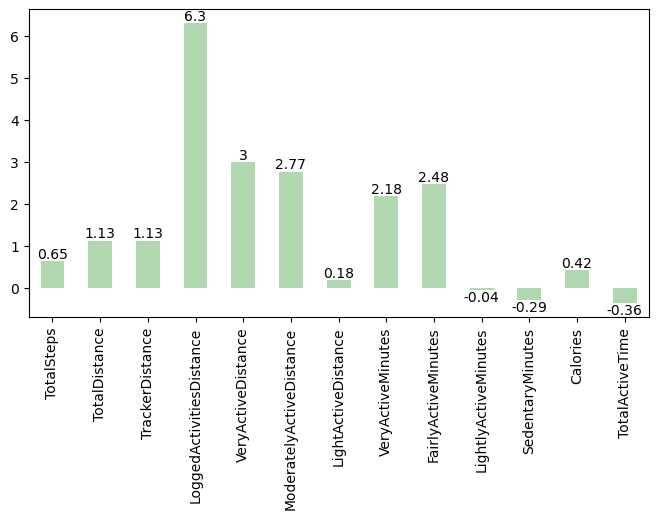

In [522]:
numerical_col = data.drop(['SedentaryActiveDistance'], axis=1).select_dtypes(include=['int64','float64'])

dt_skew=round(numerical_col.skew(),2)

ax=dt_skew.plot(kind='bar', figsize=(8,4),
               color='green', alpha=0.3)
ax.bar_label(ax.containers[0])

plt.show()

### Large Skew Observed

The following features show a very large skew that is much larger than our acceptable skew limit of |0.75|:


In [523]:
Skew=numerical_col.skew().rename_axis("Features").reset_index(name='Skew')
Skew[Skew['Skew']>0.75]

,Features,Skew
1,TotalDistance,1.126274
2,TrackerDistance,1.134550
3,LoggedActivitiesDistance,6.297440
4,VeryActiveDistance,2.996170
5,ModeratelyActiveDistance,2.771194
7,VeryActiveMinutes,2.176143
8,FairlyActiveMinutes,2.479492


Next we will see visually what this skew looks like on a histogram plot. Note that the features don't share the same units. Distance is measured in kilometers (kms) and the time related features are in minutes (mins). Putting all these features into the same histogram will not be insightful because of this difference in units/scale. We will, therefore, combine the distance related features into one plot and the time related ones into another. 

In [524]:
data_dist_skew = data.loc[:,['TotalDistance','TrackerDistance',
                        'LoggedActivitiesDistance','VeryActiveDistance',
                        'ModeratelyActiveDistance']]

data_min_skew = data.loc[:,['VeryActiveMinutes', 'FairlyActiveMinutes']]


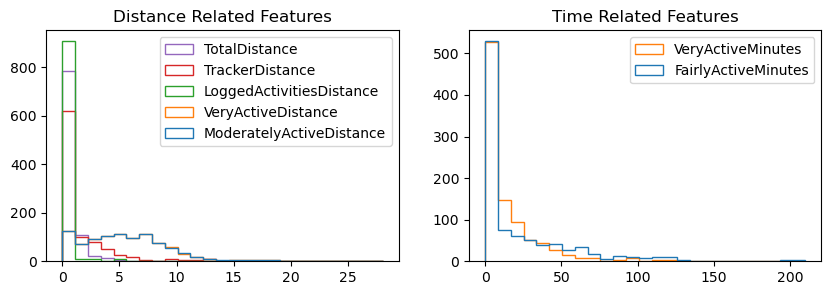

In [525]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,3)

ax1.hist(x=data_dist_skew,bins=25, alpha=1.0, rwidth = 0.7,
         histtype='step', fill=False)
ax1.set_title('Distance Related Features')
ax1.legend(data_dist_skew.columns)

ax2.hist(x=data_min_skew,bins=25, alpha=1.0, rwidth = 0.7,
         histtype='step', fill=False)
ax2.set_title('Time Related Features')
ax2.legend(data_min_skew.columns)

plt.show()

There appears to be large number of data centered around zero active distances. This data is **very skewed**. We shall, therefore, apply a **log1p transformation**. This log transformation will also take in account of the inherent zeros in the data and will transform accordingly. 

### Feature Transformation - log1p

Lets us look at the histrograms of the four skewed distance columns **before** log transformation

In [526]:
sel = [c for c in numerical_col.columns if numerical_col[c].skew()>0.75]

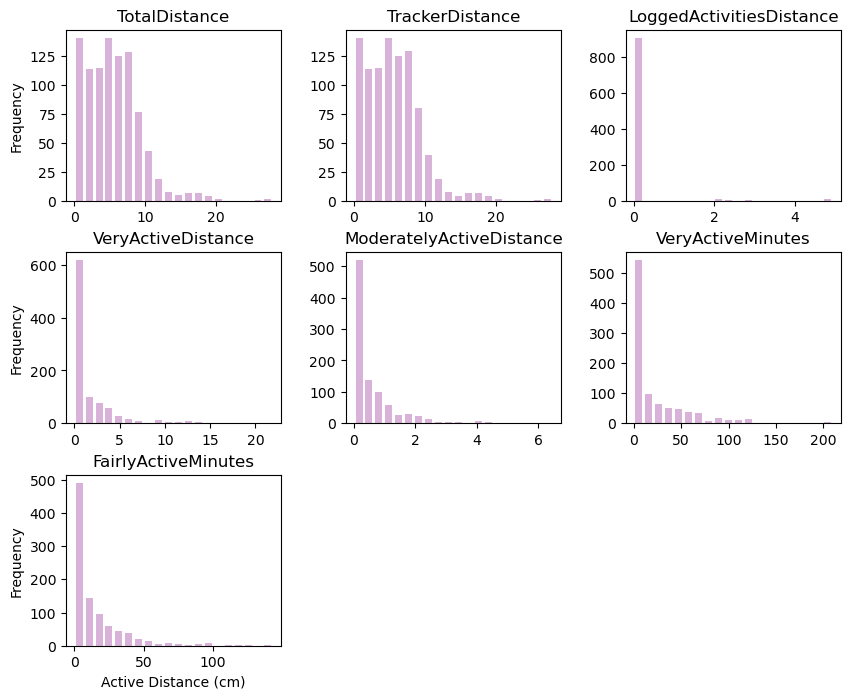

In [527]:
# To create four separate plots, use Pandas `.hist` method

data_skew = data.loc[:,sel]


axList = data_skew.hist(bins=20, figsize = (10,8), 
                             alpha=0.3, rwidth = 0.7, color='purple')

for ax in axList.flatten():
    if ax.get_subplotspec().is_last_row():
        ax.set_xlabel('Active Distance (cm)')
        
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel('Frequency')

    ax.grid(False)

In [528]:
data_log1p = data_skew.apply(np.log1p)
after_log1p=data_log1p.skew().rename_axis("Skewed Features").reset_index(name='After log1p')
before_log1p=data_skew.skew().rename_axis("Skewed Features").reset_index(name='Before log1p')

In [529]:
combine = [before_log1p,after_log1p]
pd.concat(combine, axis=1)

,Skewed Features,Before log1p,Skewed Features,After log1p
0,TotalDistance,1.126274,TotalDistance,-0.856810
1,TrackerDistance,1.134550,TrackerDistance,-0.861497
2,LoggedActivitiesDistance,6.297440,LoggedActivitiesDistance,5.499616
3,VeryActiveDistance,2.996170,VeryActiveDistance,1.071678
4,ModeratelyActiveDistance,2.771194,ModeratelyActiveDistance,1.281473
5,VeryActiveMinutes,2.176143,VeryActiveMinutes,0.273566
6,FairlyActiveMinutes,2.479492,FairlyActiveMinutes,0.104911


**Histogram after log transformation**

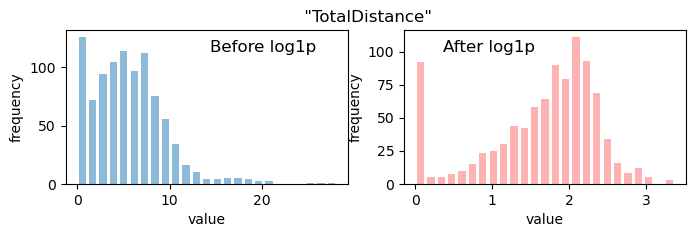

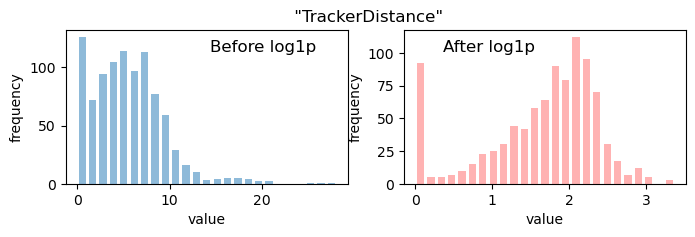

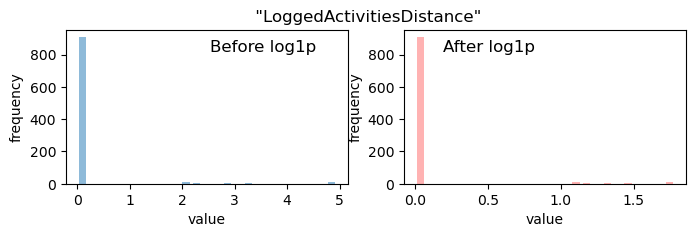

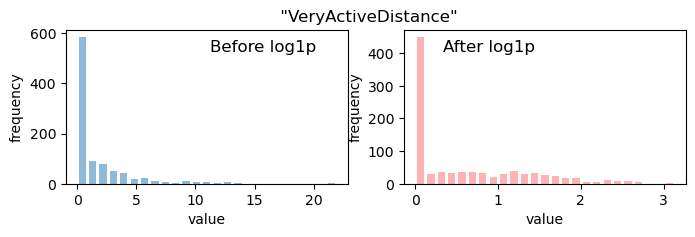

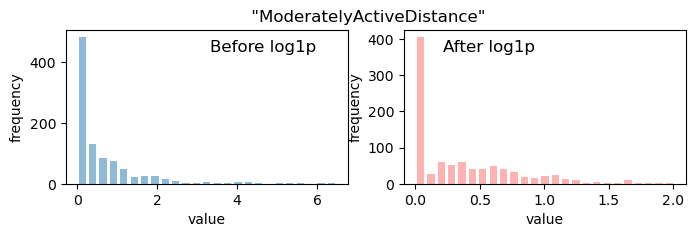

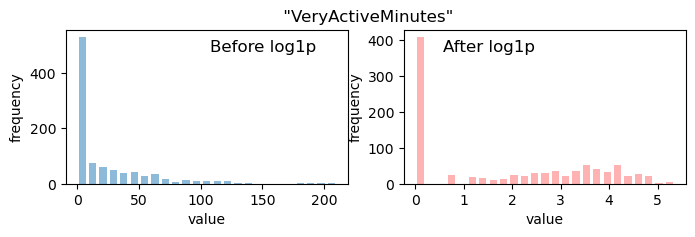

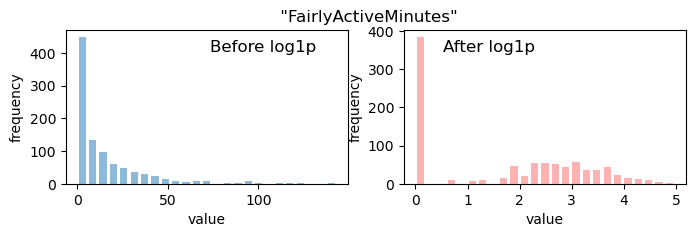

In [530]:
for field in sel:
    
    # Create two "subplots" and a "figure" using matplotlib
    fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(8, 2))

    # Formatting of titles etc. for each subplot
    fig.suptitle(' "{}"'.format(field));
    
    ax_before.set(ylabel='frequency', xlabel='value')
    ax_before.set_title('Before log1p', y=0.8, x=0.7)

    ax_after.set(ylabel='frequency', xlabel='value')
    ax_after.set_title('After log1p', y=0.8, x=0.3)

    # Create a histogram on the "ax_before" subplot
    data_skew[field].hist(ax=ax_before, bins=25, 
                               rwidth=0.7, alpha=0.5)

    # Apply a log transformation (numpy syntax) to this column
    dist_log1p[field].hist(ax=ax_after, bins=25,
                           rwidth=0.7, alpha=0.3, color='red')

    ax_before.grid(False)
    ax_after.grid(False)
    


**More Insights**

1) Log transformation did normalized the data. However, we still see exceptionally large data corresponding to 0 distances. This means that these features **are sparsed.** Later, we will need to use an appropriate regression algorithm that can handle sparse data.

2) The feature **"logged active distance"** is also heavily sparsed with more 800 zero values. This feature is also likely not going to influence the final analysis much and **can be dropped.** We will know more when we look at the correlations between the features.


### Final Dataset : log1p transformation

In [531]:
for col in sel:
    dt_fin[col]=data[col].apply(np.log1p)

### Outliers

Before we move onto working on categorical fields, we need to look at any underlying outliers in our data. Honing in on the Distance again further, let's look at some box plots. 

#### Box plots

In [532]:
numerical_col.columns

Index(['TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance', 'VeryActiveMinutes',
       'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes',
       'Calories', 'TotalActiveTime'],
      dtype='object')

In [533]:
data_dist = numerical_col.loc[:,['TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance',
                              'VeryActiveDistance', 'ModeratelyActiveDistance','LightActiveDistance'
                                ]]

data_min = numerical_col.loc[:,['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 
                                'TotalActiveTime', 'SedentaryMinutes',
                               ]]

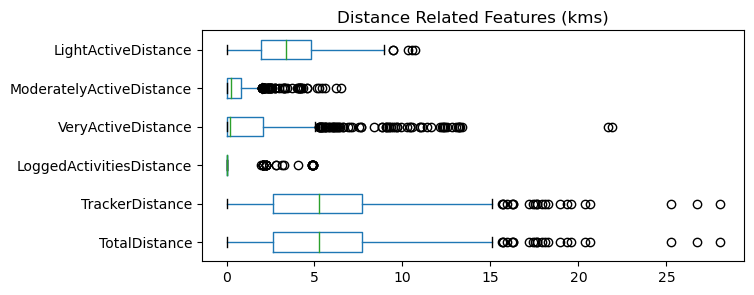

In [534]:
bx1=data_dist.boxplot(figsize = (7,3), vert=False, grid=False)
bx1.set_title('Distance Related Features (kms)')
plt.show()

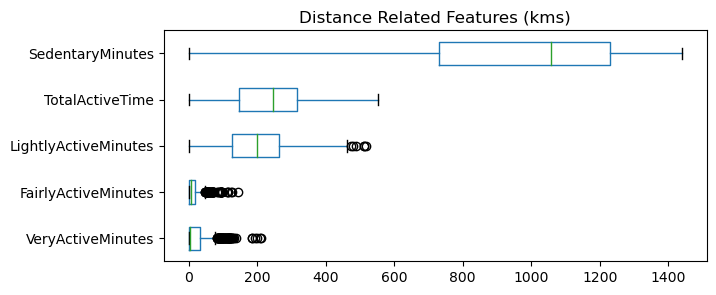

In [535]:
bx2=data_min.boxplot(figsize = (7,3), vert=False, grid=False)
bx2.set_title('Distance Related Features (kms)')
plt.show()

 **Outliers**:

  - The feature "Very Active Distance" the two data points  > 20 kms are well beyond the rest of the data.   These are indeed outliers and we can safely drop them. 
  
  - We also see some data in Total Distance for distances > 25 kms that are separated from the rest of the data but this separation does not appear to be drastic as we see in the Very Active Distance Feature. We shall therefore **retain** this data for distance > 25 kms. 
  
  - We find that a lot of data for Very and Moderately Active distances lie outside the error range .. for distances less than 15 miles. However, this is relevant data and shows that fewer people are able to sustain very active to modertately active exercise over larger distances. We shall, therefore, retain this data. 
  
  - We don't see any outliers for time related features (active minutes features). Good. 

#### Dropping outliers from Very Active Distance

In [536]:
data_dist.sort_values(by = 'VeryActiveDistance', ascending = False)[:2]

,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
50,28.030001,28.030001,0.0,21.92,4.19,1.91
927,26.719999,26.719999,0.0,21.66,0.08,4.93


<AxesSubplot:>

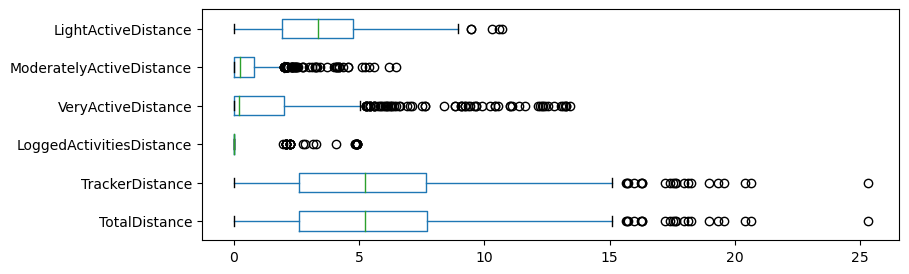

In [537]:
tmp = data_dist.drop(data_dist.index[[50,927]])
data_dist = tmp

data_dist.boxplot(figsize = (9,3), vert=False, grid=False)

#### Final Dataset : Dropping outlier 

In [538]:
dt_fin=data_dist.drop(data_dist.index[[50,927]])

# Feature Engineering

## Date Splits

We will modify the date column into three individual columns for Day, Month and Year. We will ultimately not need the column year because all the data is collected in the same year and this column will not add any useful information into our analysis.  


In [539]:
data['Month'] = pd.to_datetime(data['ActivityDate'], format='%m/%d/%Y').dt.month_name()
data['Day'] = pd.to_datetime(data['ActivityDate'], format='%m/%d/%Y').dt.day_name()
data['Year'] = pd.to_datetime(data['ActivityDate'], format='%m/%d/%Y').dt.year

mdy = data.loc[:,['Month', 'Day', 'Year' ]]
mdy.groupby('Month').value_counts().reset_index(name='counts')


,Month,Day,Year,counts
0,April,Friday,2016,97
1,April,Thursday,2016,97
2,April,Tuesday,2016,97
3,April,Wednesday,2016,97
4,April,Saturday,2016,95
5,April,Monday,2016,64
6,April,Sunday,2016,64
7,May,Sunday,2016,57
8,May,Monday,2016,56
9,May,Tuesday,2016,55


### Final Dataset : Removing the feature 'Activity Date' 
We can now remove this feature because we have split this into three individual features: day, month and year.

In [540]:
dt_fin=data.drop('ActivityDate', axis=1)

## Feature creation - adding a new column "How Active"

Here we will use the feature Total Steps to categorize each day in terms of how active the individual has been on a particular day. 

- Very Active
- Moderately Active 
- Lightly Active 
- Inactive



In [541]:
tmp2=data['TotalSteps'].apply(lambda x : "Very Active" if x > 9000 
                                                     else ("Moderately Active" if 7000 <= x < 9000
                                                          else ("Mildly Active" if 5000<= x <7000
                                                            else ("Not Very Active"))))

data['HowActive']=tmp2
data.HowActive.value_counts().rename_axis('How Active').reset_index(name='Counts')


,How Active,Counts
0,Very Active,368
1,Not Very Active,303
2,Moderately Active,135
3,Mildly Active,134


## Final Dataset : Adding column "How Active"

In [542]:
dt_fin['HowActive']=tmp2
dt_fin.HowActive.value_counts().rename_axis('How Active').reset_index(name='Counts')

,How Active,Counts
0,Very Active,368
1,Not Very Active,303
2,Moderately Active,135
3,Mildly Active,134


# One-hot Encoding

The categorical features in our data need to be converted into numeric columns. This is done by implementing one-hot encoding.

In [543]:
data_backup=data.copy()

#dt_fin.columns

In [544]:
one_hot_encode_cols = dt_fin.dtypes[dt_fin.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

data[one_hot_encode_cols].head().T
data = pd.get_dummies(dt_fin, columns=one_hot_encode_cols, drop_first=True)

## Final Dataset : One-hot encoding

In [545]:
dt_fin[one_hot_encode_cols].head().T
dt_fin = pd.get_dummies(dt_fin, columns=one_hot_encode_cols, drop_first=True)

# Feature Correlations

Looking at the correlations between the features will tell us how these features will impact our model. We look at the correlation both visually via heatmap and quantitatively. 


## Correlation with Calories

Here we will look at the correlations between our numeric features and Calories.



In [546]:
data_numeric = data.drop(['Year','SedentaryActiveDistance'], axis=1).select_dtypes(include = ['float64', 'int64'])

cal_corr = round(data_numeric.corr()['Calories'].sort_values(ascending=False),2).rename_axis('Features').reset_index(name='Correlations')
cal_corr

,Features,Correlations
0,Calories,1.00
1,TrackerDistance,0.65
2,TotalDistance,0.64
3,VeryActiveMinutes,0.62
4,TotalSteps,0.59
5,VeryActiveDistance,0.49
6,TotalActiveTime,0.47
7,LightActiveDistance,0.47
8,FairlyActiveMinutes,0.30
9,LightlyActiveMinutes,0.29


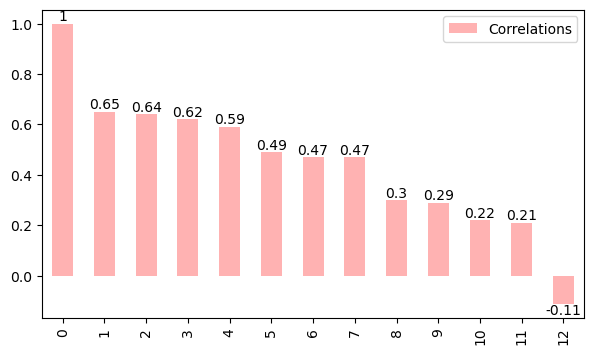

In [547]:
ax = cal_corr.plot(kind='bar',figsize=(7,4),
              color='red', alpha=0.3)
ax.bar_label(ax.containers[0])
plt.show()

## Heatmap

We are intereted in understand how the features are correlated with each other AND how the features correlate to Calories. 

Let us look at the heatmap for a visual display of the correlations between the features. 

The features are correlated with the strongest positive correlations denoted by dark blue boxes and the strongest negative correlation described by light green boxes. 




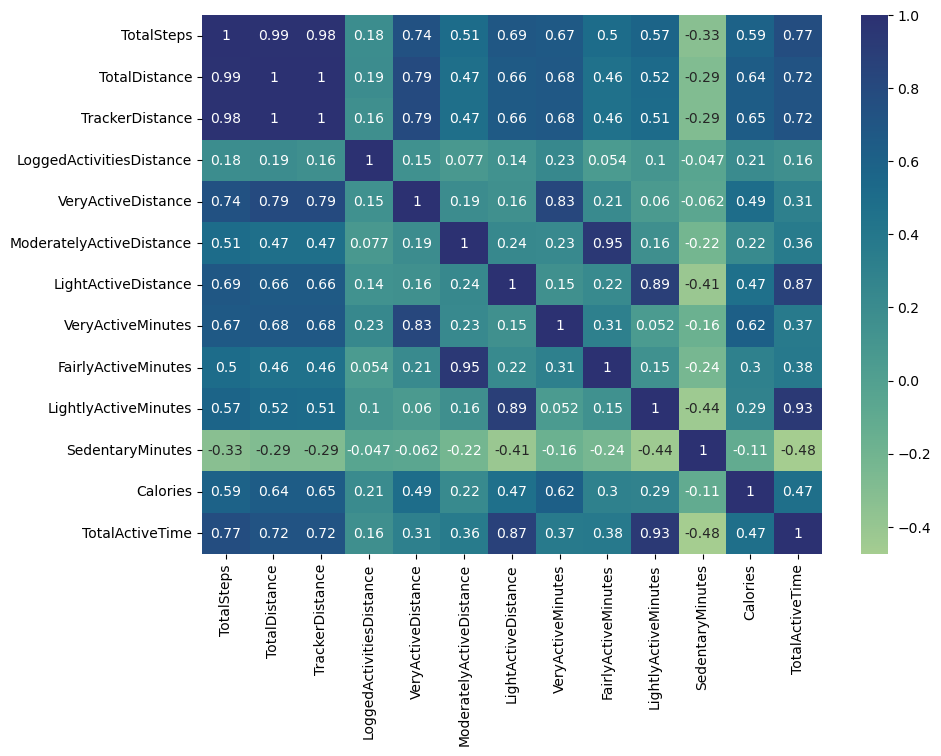

In [548]:
plt.figure(figsize=(10,7))
sns.heatmap(data_numeric.corr(),annot=True,cmap='crest')

plt.show()



**Inferences:**

- The features Total Distance and Tracker Distance are totally correlated with a corr value of 1. We need to understand the reason behind such a strong correlation. Questions to answer would be: 
  - Is there data duplication here? 
  - If the data in these two columns are (almost) identical, then do we need the feature Tracker Distance? 
  
  
- Correlations with Calories:
  - LoggedActivities Distance has a weakest correlation with Calories with a value of 0.16. This suggests that this feature is not going to influence the analysis for Calorie prediction. We need to decide if this column be dropped.
  - Unsurprisingly, the feature Sedentary Active Minutes has a moderate negative correlation with Calories. This makes intuitive sense. The more time we spend being sedentary, the less calories we are likely to burn.

# Next Steps

NOW our data is clean and ready for machine learning. In the next report we will use this data to apply linear regression model to predict the calories burnt for a particular individual on a given day. 